<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

In [1]:
# %pip install -q -r requirements.txt

## Изучение данных из файла

Импортируем библиотеку pandas и выведем первые строки таблицы методом head():

In [33]:
import pandas as pd
data = pd.read_csv('real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Была видна проблема в данных, они склеились в одну строку вместо того, чтобы разбиться по колонкам. Мы прочитаем данные, указав в качестве разделителя знак табуляции (\t).

В таблице 22 столбца с разными типами данных. Колонки содержат следующие данные:

1. airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
2. balcony — число балконов
3. ceiling_height — высота потолков (м)
4. cityCenters_nearest — расстояние до центра города (м)
5. days_exposition — сколько дней было размещено объявление (от публикации до снятия)
6. first_day_exposition — дата публикации
7. floor — этаж
8. floors_total — всего этажей в доме
9. is_apartment — апартаменты (булев тип)
10. kitchen_area — площадь кухни в квадратных метрах (м²)
11. last_price — цена на момент снятия с публикации
12. living_area — жилая площадь в квадратных метрах (м²)
13. locality_name — название населённого пункта
14. open_plan — свободная планировка (булев тип)
15. parks_around3000 — число парков в радиусе 3 км
16. parks_nearest — расстояние до ближайшего парка (м)
17. ponds_around3000 — число водоёмов в радиусе 3 км
18. ponds_nearest — расстояние до ближайшего водоёма (м)
19. rooms — число комнат
20. studio — квартира-студия (булев тип)
21. total_area — площадь квартиры в квадратных метрах (м²)
22. total_images — число фотографий квартиры в объявлении
    
Пояснение: апартаменты — это нежилые помещения, которые не относятся к жилому фонду, но имеют необходимые условия для проживания.

**Вывод**

В каждой строке информация  о квартире, которая выставлена на продажу. На данном этапе привели данные в удобный для чтения формат. При первичном анализе таблицы видно, что многие колонки содержат пропущенные значения "NaN", ими и займемся.

## Предобработка данных

Изучив данные, видно, что пропуски имеются в следующих столбцах: 'airports_nearest', 'balcony', 'ceiling_height', 'cityCenters_nearest', 'days_exposition', 'floors_total', 'is_apartment', 'kitchen_area', 'living_area', 'locality_name', 'parks_around3000', 'ponds_around3000'. Нужно решить, что с ними делать. 

Логично предположить, что если человек не указал количество балконов, то, вероятней всего, их нет. Заменим все пропусти в столбце "балконов" на нули.

Также, скорей всего, если у человека апартаменты - он сообщает об этом. Поэтому заменим все пропущенные данные в 'is_apartment' на False.

Данные 'kitchen_area' и 'living_area' заменим на медианные значения по количеству комнат.

Остальные данные заменим на медианные значения без дополнительных группировок: 'airports_nearest', 'ceiling_height', 'cityCenters_nearest', 'days_exposition', 'floors_total', 'locality_name', 'parks_around3000', 'ponds_around3000'.

In [34]:
# заменяем пропуски в столбце balcony на 0, а пропуски в is_apartment на False
data['balcony'] = data['balcony'].fillna(value = 0)
data['is_apartment'] = data['is_apartment'].fillna(value = False)

# заменяем пропуски в столбцах kitchen_area и living_area на медианы по количеству комнат
kitchen_area_median = data.groupby('rooms')['kitchen_area'].median()
for rooms in data['rooms'].unique():
    kitchen_area_median = data.loc[data['rooms'] == rooms, 'kitchen_area'].median()
    data.loc[(data['kitchen_area'].isna()) & (data['rooms'] == rooms), 'kitchen_area'] = kitchen_area_median 
living_area_median = data.groupby('rooms')['living_area'].median()
for rooms in data['rooms'].unique():
    living_area_median = data.loc[data['rooms'] == rooms, 'living_area'].median()
    data.loc[(data['living_area'].isna()) & (data['rooms'] == rooms), 'living_area'] = living_area_median

# удаляем строки, где пропущены значения в столбце kitchen_area и living_area
data =data[(~data['locality_name'].isna())]
    
# заменяем пропуски в столбах airports_nearest, ceiling_height, cityCenters_nearest, days_exposition, floors_total, kitchen_area, parks_around3000, 'parks_nearest', ponds_around3000 и 'ponds_nearest' на медианные значения по столбцу
columns = ('airports_nearest', 'ceiling_height', 'cityCenters_nearest', 'days_exposition', 'floors_total', 'kitchen_area', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest')
for index_abc in columns:
    data.loc[data[index_abc].isna(), index_abc] = data[index_abc].median()
    
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,454.5,0.0,502.0,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,45.0,9,False,...,9.5,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Большинство данных дробные (тип float64). Для текущего исследования такая точно ни к чему, поэтому округлим все данные до целого, кроме высоты потолков. Для этого применим цикл, который пройдется списку столбцов и изменит тип данных методом astype():

In [5]:
# создаем список switch, который содержит название столбцов, в которых нужно изменить тип данных
# создаем цикл, который проходит по списку switch и меняет данные методом astype()
switch = ('last_price', 'days_exposition', 'total_area', 'floors_total', 'living_area', 'kitchen_area', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest')
for index in switch:
    data[index] = data[index].astype('int')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108,2019-03-07T00:00:00,3,2.70,16,51,8,False,...,25,0,Санкт-Петербург,18863,16028,1,482,2,755,95
1,7,3350000,40,2018-12-04T00:00:00,1,2.65,11,18,1,False,...,11,2,посёлок Шушары,12817,18603,0,454,0,502,81
2,10,5196000,56,2015-08-20T00:00:00,2,2.65,5,34,4,False,...,8,0,Санкт-Петербург,21741,13933,1,90,2,574,558
3,0,64900000,159,2015-07-24T00:00:00,3,2.65,14,45,9,False,...,9,0,Санкт-Петербург,28098,6800,2,84,3,234,424
4,2,10000000,100,2018-06-19T00:00:00,2,3.03,14,32,13,False,...,41,0,Санкт-Петербург,31856,8098,2,112,1,48,121


**Вывод**

На этом этапе были заполнены все пропуски и изменен тип большинства данных. После замены пропусков в kitchen_area и living_area на медианные значения остались пропуски, так как для rooms = 0 все значения пропущенны. Поэтому после замены такие пропуски заменили на медианы по всем данным. Что касается kitchen_area и living_area, было решено удалить строки, где пропущенно такое значение, это небольшая часть данных (49 строк) и это не должно сказаться на дальнейшем исследовании.

## Расчёты и добавление результатов в таблицу

По задаче нам нужно добавить и рассчитать следующие столбцы:
1. цену квадратного метра;
2. день недели, месяц и год публикации объявления;
3. этаж квартиры; варианты — первый, последний, другой;
4. соотношение жилой и общей площади, а также отношение площади кухни к общей.

На данном этапе необходимо добавить несколько колонок в данные. Начнем с цены квадратного метра, для этого поделим общую цену на площадь квартиры и полученные данные зафиксируем в столбце price_meter.

Затем добавим день, месяц и год публикации объявления, для этого не нужно дополнительный рассчетов - используем метод dt.weekday, dt.month и dt.year. Назовем их соответствующе weekday, month и year.

Для определения этажа создадим функцию text_floor, которая будет проверять этаж (floor) и возращать нужное значение.

Для определения соотношений жилой площади к общей и площади кухни к общей нужно задействовать два столбца и деление одного на другой.

In [81]:
# добавляем новый столбец с ценой за квадратный метр
data['price_meter'] = data['last_price'] / data['total_area']

# добавляем новыe столбцы weekday,month и year с указанием дня, месяца и года публикации объявления 
data['weekday'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d').dt.weekday
data['month'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d').dt.month
data['year'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d').dt.year 

# написание функции text_floor, которая возвращает значение в зависимости от этажа
def text_floor(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
# создание нового столбца после применения функции text_floor к столбцу floor
data['floor_text'] = data.apply(text_floor, axis = 1)

# добавляем новые столбцы share_living и share_kitchen с соотношением жилой к общей площади и площади кухни к общей
data['share_living'] = data['living_area'] / data['total_area']
data['share_kitchen'] = data['kitchen_area'] / data['total_area']

**Вывод**

На этом этапе нужно было добавить несколько столбцов, что мы с успехом выполнили. Для этого понадобилось вспомнить, как создается новый столбец, создается функция с выводом нужного значения и работа с датами.

## Исследовательский анализ данных

После предобработки данных можем приступить к анализу. Нам нужно изучить следующие параметры: площадь, цена, число комнат, высота потолков. Также, построить гистограммы для каждого параметра. Нужные нам параметры содержатся в столбцах: total_area, last_price или price_meter, rooms, ceiling_height.

Для исследования проверим каждый из нужных параметров методом describe() и построим гистограмму 

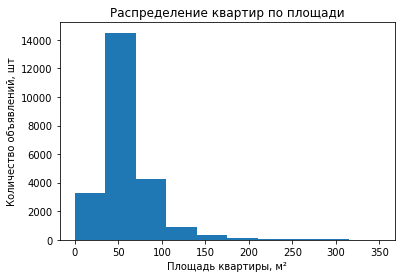

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64
Значения для выброса через IQR: 197.6


In [79]:
import matplotlib.pyplot as plt
# data['total_area'].hist(bins=10, range=(0, 350), figsize=(20,5))
total_area_hist = data['total_area'].plot(kind='hist', title='Распределение квартир по площади', range=(0,350))
# Добавляем подписи к осям:
total_area_hist.set_xlabel('Площадь квартиры, м²')
total_area_hist.set_ylabel('Количество объявлений, шт')
plt.show()

print(data['total_area'].describe())
# расчет значений для выброса через IQR
print('Значения для выброса через IQR:', data['total_area'].quantile(0.99).round(1))

Распределение площади похоже на типичное (нормальное) распределения, с пиком по середине и распределением значений по бокам пика. Если смотреть по графику, то примерное значение для выброса - 175 квадратных метров. Если использовать IQR для выброса, то выбросами являются значения, которые превышают 197.6 квадратных метров. Медиана для площади - 52 квадратных метра.

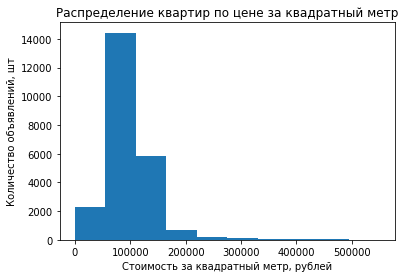

count    2.365000e+04
mean     9.943225e+04
std      5.033794e+04
min      1.118349e+02
25%      7.661497e+04
50%      9.500000e+04
75%      1.142742e+05
max      1.907500e+06
Name: price_meter, dtype: float64
Максимальное значение для выброса через IQR: 267234.2
Минимальное значение для выброса через IQR: 23200.9


In [105]:
# data['price_meter'].hist(bins=10, range=(0, 550000), figsize=(20,5))

price_meter_hist = data['price_meter'].plot(kind='hist', title='Распределение квартир по цене за квадратный метр', range=(0,550000))
price_meter_hist.set_xlabel('Стоимость за квадратный метр, рублей')
price_meter_hist.set_ylabel('Количество объявлений, шт')
plt.show()

print(data['price_meter'].describe())
print('Максимальное значение для выброса через IQR:', data['price_meter'].quantile(0.99).round(1))
print('Минимальное значение для выброса через IQR:', data['price_meter'].quantile(0.01).round(1))

Распределение цены за метр тоже напоминает типичное, медиана по цене за квадратный метр - 95000 рублей. По графику примерно значение для выброса 220 тысяч рублей. По IQR такое значение порядка 267,3 тысяч рублей. Также, рассчитаем через квантили минимальные значения для выброса, это значение составило 23,2 тысячи рублей за квадратный метр. Слишком заниженная цена может быть мошеннической. 

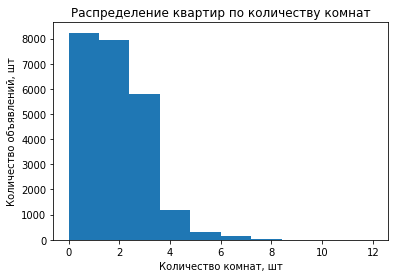

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64
Значения для выброса через IQR: 5.0


In [94]:
# data['rooms'].hist(bins=10, range=(0, 12), figsize=(20,5))

rooms_hist = data['rooms'].plot(kind='hist', title='Распределение квартир по количеству комнат', range=(0,12))
rooms_hist.set_xlabel('Количество комнат, шт')
rooms_hist.set_ylabel('Количество объявлений, шт')
plt.show()

print(data['rooms'].describe())
print('Значения для выброса через IQR:', data['rooms'].quantile(0.99).round(1))

Распределение по количеству комнат не совсем типичное, пик смещен влево. По графику значения свыше 6 кажутся выброса. По IQR - выбросы это квартиры свыше 5 комнатных. Медианное значение по количеству комнат - 2.

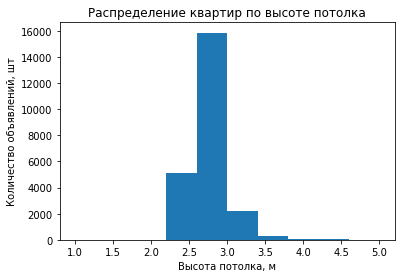

count    23650.000000
mean         2.724311
std          0.989255
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64
Максимальное значение для выброса через IQR: 3.6
Минимальное значение для выброса через IQR: 2.5


In [101]:
# data['ceiling_height'].hist(bins=20, range=(1,3), figsize=(20,5))

ceiling_height_hist = data['ceiling_height'].plot(kind='hist', title='Распределение квартир по высоте потолка', range=(1,5))
ceiling_height_hist.set_xlabel('Высота потолка, м')
ceiling_height_hist.set_ylabel('Количество объявлений, шт')
plt.show()

print(data['ceiling_height'].describe())
print('Максимальное значение для выброса через IQR:', data['ceiling_height'].quantile(0.99).round(1))
print('Минимальное значение для выброса через IQR:', data['ceiling_height'].quantile(0.01).round(1))

Распределение квартир по высоте потолка типичное, есть пик и значения по его бокам. По графику нам нужны значения от 2,4 метров до 3,45 метров. Если использовать IQR, то значения от 2,5 метров до 3,6 метров. Медиана по высоте потолков равна 2,65 метров.

Под каждым графиком кратко описали характер графика, расчитали медиану и выделили значения для выброса.

Если использовать диаграмму размаха и IQR (рассчитываем методом quantile(0.99)), то значения для выбросов будут равны:
1. для площади (total_area) - 197,6 квадратных метров.
2. для цены за квадратный метр (price_meter) - от 23,2 тысяч рублей до 267,3 тысяч рублей.
3. для количества комнат (rooms) - 5 комнат.
4. для высоты потолков (ceiling_height) - с 2,5 до 3,6 метров.

Если брать значения, исходя из гистограмм. Значения, свыше которых выбросим данные:
1. для площади - 175 квадратных метров.
2. для цены за квадратный метр - 220 тысяч рублей.
3. для количества комнат - 6 комнат.
4. для высоты потолков - с 2,4 до 3,45 метров.

Воспользуемя более автоматизированным способом и возьмем значения для выброса, рассчитанные через квантиль. Сразу создадим новую таблицу с предложенными ограничениями, для этого используем метод query():

In [108]:
# создаем новую таблицу data_good с предложенными условиями
data_good = data.query('total_area<197.6 and 23200<price_meter<267300 and rooms<=5 and 2.5<=ceiling_height<=3.6')

Теперь нужно исследовать еще один параметр - время продажи квартиры (days_exposition). Сначала сравним среднее и медиану этого параметра, затем построим гистограмму.

Среднее значение времени продажи: 167.7182383831252
Медианное значение времени продажи: 95.0


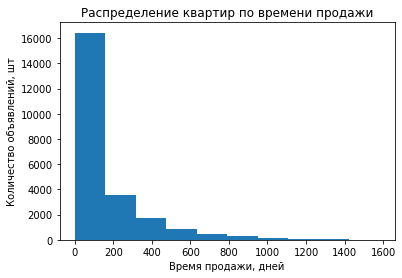

In [118]:
# рассчитываем среднее значение и медиану days_exposition
print('Среднее значение времени продажи:', data_good['days_exposition'].mean())
print('Медианное значение времени продажи:', data_good['days_exposition'].median())
# строим гистограмму по days_exposition
# data['days_exposition'].hist(bins=50, figsize=(20,5))

days_exposition_hist = data['days_exposition'].plot(kind='hist', title='Распределение квартир по времени продажи')
days_exposition_hist.set_xlabel('Время продажи, дней')
days_exposition_hist.set_ylabel('Количество объявлений, шт')
plt.show()

По этой гистограмме можем определить только слишком долгие продажи, примем это значение как 600 дней. Чтобы проверить слишком быстрые продажи, построим гистограмму по этому же столбцу, но ограничим максимальное значение по оси Х, как 200 дней.

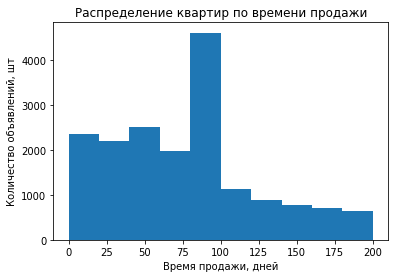

In [119]:
# data['days_exposition'].hist(bins=50, range=(0,200), figsize=(20,5))

days_exposition_hist = data['days_exposition'].plot(kind='hist', title='Распределение квартир по времени продажи', range=(0,200))
days_exposition_hist.set_xlabel('Время продажи, дней')
days_exposition_hist.set_ylabel('Количество объявлений, шт')
plt.show()

Допустим слишком короткие это значения до первого значительного пика, это значения меньше 40. Получается, в среднем квартира продается за 90 дней. Из этого можно сделать вывод, что медиана корректно описывает данные.

Дальше проверим, какие факторы и как влияют на стоимость. Стоимость будем брать за квадратный метр, так как более универсальная и не зависит от площади квартиры. Проанализируем зависит ли цена от площади, числа комнат, удалённости от центра. Для наглядности будем использовать сводные таблицы (метод pivot_table).

Начнем с влияния площади на цену. Так как уникальных значений по площади слишком много, то создадим формальное разделение и посмотрим медианное значение цены для каждого:

In [14]:
data['total_area'].describe()

count    23650.000000
mean        60.100930
std         35.673519
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        900.000000
Name: total_area, dtype: float64

In [112]:
def square(row):
    square = row['total_area']
    if square <= 20:
        return 'очень маленькая'
    elif 20 < square <= 40:
        return 'маленькая'
    elif 40 < square <= 60:
        return 'средняя'
    elif 60 < square <= 80:
        return 'большая'
    elif square > 80:
        return 'очень большая'
data_good['square'] = data_good.apply(square, axis = 1)
data_good.pivot_table(index='square', values='price_meter', aggfunc='median')

,price_meter
square,
большая,90909.090909
маленькая,99666.666667
очень большая,106135.200241
очень маленькая,113382.352941
средняя,90121.317158


Что и требовалось доказать. У средних и больших квартир она минимальна (порядка 90 тысяч), у остальных больше - порядка 100-120 тысяч. Таким образом площадь не сильно влияет на цену за квадратный метр.

Проверим следующий параметр - количество комнат. Аналогично построим сводную таблицу с медианными значениями цены за квадратный метр.

In [16]:
data_good.pivot_table(index='rooms', values='price_meter', aggfunc='median')

,price_meter
rooms,
0,104545.454545
1,100000.000000
2,92195.444915
3,87658.227848
4,87333.333333
5,85921.474359


Исходя из полученных данных, может сделать вывод, что чем больше комнат, тем дешевле стоимость квадратного метро. В принципе, это логично, можно сказать, что опт выгоднее (но стоит учесть, что общая стоимость будет больше). Количество комнат более явнее влияет на цену, разница между максимальным и минимальным значениями порядка 20 тысяч, разница существенная.

Продолжить изучать данные, рассмотрим влияние удаленности от центра на цену. Для этого нам также потребуется дополнительное разделение, так как значения практически все разные в столбце с удаленностью (cityCenters_nearest).

In [113]:
# написание функции center, которая возвращает значение в зависимости от удаленности от центра
def center(row):
    center = row['cityCenters_nearest']
    if center <= 1000:
        return 'очень близко'
    elif 1000 < center <= 3000:
        return 'близко'
    elif 3000 < center <= 10000:
        return 'средне'
    elif 10000 < center <= 20000:
        return 'далеко'
    elif center > 20000:
        return 'очень далеко'
# создание нового столбца после применения функции center к столбцу cityCenters_nearest
data_good['center'] = data_good.apply(center, axis = 1)

# построение сводной таблицы
data_good.pivot_table(index='center', values='price_meter', aggfunc='median')

,price_meter
center,
близко,115921.816146
далеко,92105.263158
очень близко,123462.417080
очень далеко,82256.169213
средне,116666.666667


Смотря на полученную таблицу, видим, что цена за квадратный метр одинакова для квартир, которые находятся в пределах 10 км от центра. Если расстояние увеличивается, то стоимость снижается, что логично.

Теперь перед нами стоит задача изучить зависимость цены от этажа. Для этажа будет 3 варианта: первый, последний или другой, соответствующий столбец мы уже создали (floor_text). Еще в этом блоке изучим зависимость цены от даты размещения: дня недели, месяца и года. Как и в предыдущие разы, воспользуемся сводными таблицами.

In [18]:
data_good.pivot_table(index='floor_text', values='price_meter', aggfunc='median')

,price_meter
floor_text,
другой,98095.454545
первый,79756.097561
последний,85365.853659


Да, первый этаж (предсказуемо) самый дешевый, затем идет последний. И самые дорогие - другие. Все как в жизни, люди хотят жить в золотой середине, чуть отдаленно от подвала или крыши. Таким образом, этаж оказывает влияние на ценообразование.

Посмотрим как влияет день, месяц и год на цену. Для этого используем столбцы weekday, month и year.

In [19]:
data_good.pivot_table(index='weekday', values='price_meter', aggfunc='median')

,price_meter
weekday,
0,94654.761905
1,95185.185185
2,95000.000000
3,94878.048780
4,94320.381232
5,93589.743590
6,94227.886057


In [20]:
data_good.pivot_table(index='month', values='price_meter', aggfunc='median')

,price_meter
month,
1,95171.006607
2,94262.295082
3,96103.896104
4,95614.035088
5,91982.142857
6,91851.285190
7,94565.217391
8,95495.129870
9,95945.945946


In [114]:
data_good.pivot_table(index='year', values='last_price', aggfunc='median')

,last_price
year,
2014,7300000.0
2015,5200000.0
2016,4480000.0
2017,4490000.0
2018,4550000.0
2019,5000000.0


Если взглянуть на 3 полученные таблицы, то видно, что день и месяц не оказывают влияние на цену. Продажа квартир актуальна в любой день и месяц. Год повлиял на цену: в 2014 году цена была максимальна, но затем стала падать и положительный тред стал только после 2017 года.

Продолжим изучение данных. Необходимо выбрать 10 населённых пунктов с наибольшим числом объявлений и посчитать среднюю цену квадратного метра. Объединим эти требования и построим сводную таблицу, которая группирует значения по местоположению (locality_name) и выводи медиану с количеством объявлений:

In [115]:
data_good_local = data_good.pivot_table(index='locality_name', values='price_meter', aggfunc=['median', 'count'])
data_good_local.columns = ['median', 'count']
data_good_local = data_good_local.query('count > 170').sort_values(by='count', ascending=False)
data_good_local

,median,count
locality_name,,
Санкт-Петербург,104233.251304,15056
посёлок Мурино,85878.462169,520
посёлок Шушары,76829.268293,439
Всеволожск,65789.473684,394
Пушкин,99987.179487,355
Колпино,74723.748474,336
посёлок Парголово,91917.591125,325
Гатчина,67935.710870,302
деревня Кудрово,91860.465116,299


Не трудно догадаться, что максимальное количество объявлений в Северной столице - порядка 15 тысяц штук. У остальных меньше 520 объявлений и минимальное в нашем срезе - Кудрово с 172 объявлением.

Сейчас перед нами задача с определением центра. Необходимо сделать срез квартир, которые находятся в Санкт-Петербурге и рассчитать среднюю стоимость каждого километра. Далее построим график зависимости цены от расстояния от центра, чтобы выяснить где этот "центр" заканчивается.

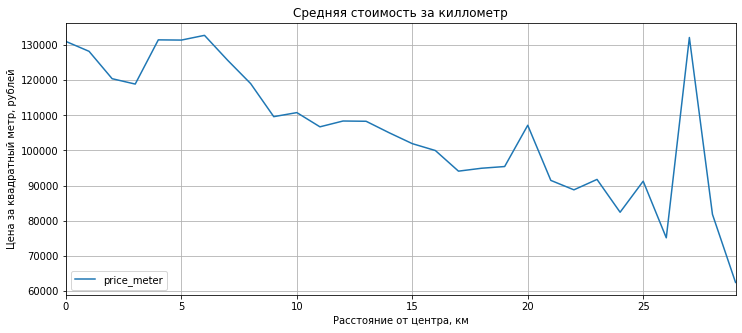

In [120]:
spb = data_good.query('locality_name == "Санкт-Петербург"')
spb['cityCenters_nearest_km'] = (spb['cityCenters_nearest'] / 1000).astype('int')
spb.pivot_table(index='cityCenters_nearest_km', values='price_meter', aggfunc='mean').plot(grid=True, figsize=(12, 5))
plt.title('Средняя стоимость за киллометр')
plt.xlabel('Расстояние от центра, км')
plt.ylabel('Цена за квадратный метр, рублей')
plt.show()

По графику видим резкий провал после 25 километров. Это и будет нашим Центром.

После найденного Центра, исследуем несколько параметров: площадь, цену, число комнат, высоту потолков.

count    476.000000
mean      85.384286
std       33.120004
min       12.000000
25%       61.900000
50%       81.000000
75%      103.000000
max      185.000000
Name: total_area, dtype: float64


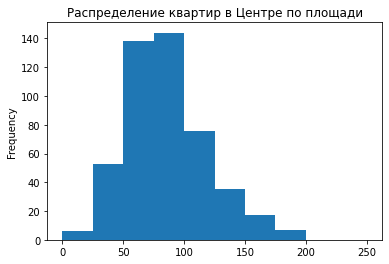

In [122]:
spb_center = spb.query('cityCenters_nearest_km < 3')
print(spb_center['total_area'].describe())
# spb_center['total_area'].hist(bins=10, range=(0, 350), figsize=(20,5))

spb_center_hist = spb_center['total_area'].plot(kind='hist', title='Распределение квартир в Центре по площади', range=(0, 250))
spb_center_hist.set_xlabel('Площадь квартиры, м²')
spb_center_hist.set_ylabel('Количество объявлений, шт')
plt.show()

Сравним полученные данные и отфильтрованные первичные данные. Видим, что значения медианы значительно изменились: была 52 - стала 81; среднее изменилось: было 60,3 - стало 85,0. В целом, данные сопоставимы. Можно сделать промежуточный вывод, что средняя площадь в Центре выше, чем в общей выборке.

count       476.000000
mean     124623.082370
std       38874.655374
min       62126.245847
25%       95967.268209
50%      116225.002385
75%      141660.108430
max      262032.085561
Name: price_meter, dtype: float64


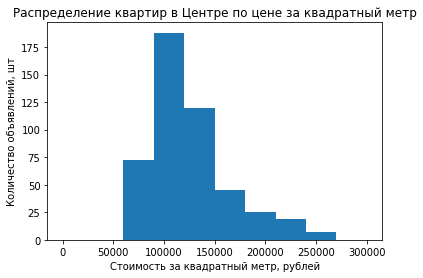

In [124]:
print(spb_center['price_meter'].describe())
# spb_center['price_meter'].hist(bins=10, range=(0, 550000), figsize=(20,5))

spb_center_hist = spb_center['price_meter'].plot(kind='hist', title='Распределение квартир в Центре по цене за квадратный метр', range=(0, 300000))
spb_center_hist.set_xlabel('Стоимость за квадратный метр, рублей')
spb_center_hist.set_ylabel('Количество объявлений, шт')
plt.show()

Аналогично сравним и параметр цены за квадратный метр. Что касается изменений медианы: была 95 тысяч - стала 116 тысяч; среднее изменилось значительнее: было 95 тысяч - стало 124,5 тысяч. В целом, данные сопоставимы. Также, логично, что в среднем цена в Центре выше.

count    476.000000
mean       2.880252
std        1.074268
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: rooms, dtype: float64


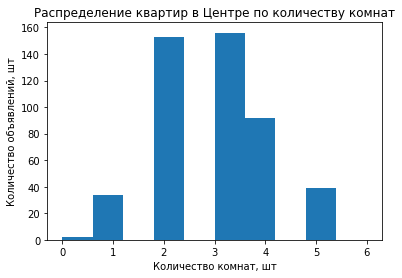

In [127]:
print(spb_center['rooms'].describe())
# spb_center['rooms'].hist(bins=10, range=(0, 12), figsize=(20,5))

spb_center_hist = spb_center['rooms'].plot(kind='hist', title='Распределение квартир в Центре по количеству комнат', range=(0, 6))
spb_center_hist.set_xlabel('Количество комнат, шт')
spb_center_hist.set_ylabel('Количество объявлений, шт')
plt.show()

Что касается количества комнат, то для общей выборки медиана была - 2 комнаты, а для Центра стало 3 комнаты. Среднее увеличилось с 2,1 до 2,9. Таким образом, в Центре квартиры крупнее, чем в общей выборке.

count    476.000000
mean       2.967290
std        0.311162
min        2.500000
25%        2.650000
50%        3.000000
75%        3.200000
max        3.600000
Name: ceiling_height, dtype: float64


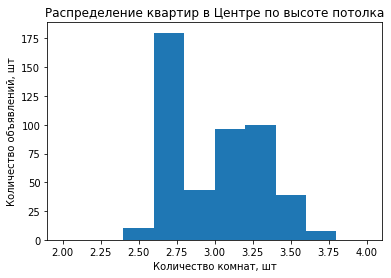

In [129]:
print(spb_center['ceiling_height'].describe())
# spb_center['ceiling_height'].hist(bins=20, range=(1,3), figsize=(20,5))

spb_center_hist = spb_center['ceiling_height'].plot(kind='hist', title='Распределение квартир в Центре по высоте потолка', range=(2, 4))
spb_center_hist.set_xlabel('Количество комнат, шт')
spb_center_hist.set_ylabel('Количество объявлений, шт')
plt.show()

Что касается высоты потолков, их также коснулись изменения и значения возросли. Медиана была 2,65 метров, стала 3 метра. Среднее значение возросло с 2,72 метров до 2,97 метров. Таким образом, в Центре квартиры не только дороже и больше, но и "выше".

Проанализировав данные двух вариантов, можно сделать вывод, что медианы и средние значения увеличелись практически на равные значения, но, как правило, лучше использовать медиану для анализа, в отличии от среднего значения, так как она менее зависима от некоторых параметров. Одно из отличий в значения центрального Питера - максимальные значения, так как мы выбросили аномальные значения. И, конечно же, оказалось, что квартиры в Центре дороже и просторнее, чем по общей выборке.

На заключительном этапе проверим влияние следующих параметров: число комнат, этаж, удалённость от центра, дата размещения объявления. Для первых трех параметров используем сводную таблицу, которая группирует значение по каждому параметру и выводит медианное значение цены за квадратный метр. Для даты размещения объявления иследуем знакомую нам гистограмму по количеству дней активности объявления, чтобы сравнить со значениями по всему региону.

In [130]:
spb_center.pivot_table(index='rooms', values='price_meter', aggfunc='median')

,price_meter
rooms,
0,133421.610169
1,125962.772786
2,123529.411765
3,117797.888386
4,103337.008308
5,96482.412060


Если сравнивать со значениями по всему региону, то тут ожидаемо, что цена выше, все-таки центр. Для студий (0 комнат) медианная цена увеличилась почти на 30 тысяч (была 104,5 тысячи). А для 5-ти комнатых увеличилась на 10 тысяч (была 86 тысяч).

In [131]:
spb_center.pivot_table(index='floor_text', values='price_meter', aggfunc='median')

,price_meter
floor_text,
другой,119058.962264
первый,105535.087719
последний,116280.409731


Центр также сильно сказался и на влиянии этажей на цену. Для первого этажа медианная цена увеличилась на 25 тысяч, для последнего на 30 тысяч, для других на 20 тысячи.

In [132]:
spb_center.pivot_table(index='center', values='price_meter', aggfunc='median')

,price_meter
center,
близко,115921.816146
очень близко,123462.417080


Эти данные не изменились, но остались только близкие и очень близкие значения, так как они находятся в центре. Это логично, так как в нашем проекте Центр - 3 киллометра.

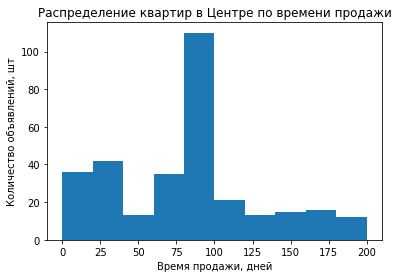

In [140]:
# spb_center['days_exposition'].hist(bins=50, range=(0,200), figsize=(20,5))

spb_center_hist = spb_center['days_exposition'].plot(kind='hist', title='Распределение квартир в Центре по времени продажи', range=(0, 200))
spb_center_hist.set_xlabel('Время продажи, дней')
spb_center_hist.set_ylabel('Количество объявлений, шт')
plt.show()

График практически идентичен с графиком по всему региону. Пик также порядка 90 дней.

**Вывод**

На данном этапе было выполнено несколько шагов: изучены влияние основных параметро на цену (в проекте использовали цену за квадратный метр). Убрали редкие и аномальные значения, нашли края центра Питера и сравнили значения со всем регионом.

## Вывод

Была проделана большая работа, по итогам которой можно выделить несколько моментов: максимальная стоимость квадратного метра выявлена для квартир, которые находятся максимально близко к центру города; находятся не на первом и не на последнем этажах; имеют меньше двух комнат (однушки и студии).

Чем дальше находится квартира, тем она дешевле. Чем больше комнат, тем меньше стоимость квадратного метра, но стоит учитывать, что общая сумма значительно увеличивается из-за площади.

Квартиры чаще всего продаются за 3 месяца (90 дней).

Нет определенной тенденции, когда квартиры выставляют на продажу, это актуально в любой день, месяц и год.

По итогам исследования мы доказали, что квартиры в Центре (в пределах 3 км) значительно больше и дороже, чем по всему району. Количественно изменения составили (использовали медианные значения):
1. Площадь: для всего региона - 52 квадратных метра, для центра - 81 квадратнный метр.
2. Цена за квадратный метр: регион - 95 тысяч рублей, центр - 116 тысяч рублей.
3. Количество комнат: регион - двушки (2), центр - трешки (3).
4. Высота потолков: регион - 2,65 метров, центр - 3 метра.